In [1]:
import numpy as np
from acrobotics.util import get_default_axes3d
from acrobotics.recources.robots import Kuka
from acrobotics.path import FreeOrientationPt
from acrobotics.geometry import Shape, Collection

In [2]:
robot = Kuka()

path = []
for s in np.linspace(0, 1, 8):
    xi = 0.8
    yi = s * 0.2 + (1-s) * (-0.2)
    zi = 0.2
    path.append(FreeOrientationPt([xi, yi, zi]))

floor_plane = Shape(0.5, 0.5, 0.1)
floor_plane_tf = np.array([[1, 0, 0, 0.80],
                            [0, 1, 0, 0.00],
                            [0, 0, 1, 0.12],
                            [0, 0, 0, 1]])

scene = Collection([floor_plane], [floor_plane_tf])

In [3]:
from acrobotics.planning import cart_to_joint_no_redundancy
from acrobotics.planning import get_shortest_path

In [7]:
solutions = []
run_ns_values = [50, 100, 200, 300, 500, 750, 1000]
for ns in run_ns_values:
    print('Running planner for ns = {}.'.format(ns))
    Q = cart_to_joint_no_redundancy(robot, path, scene, num_samples=ns)
    res = get_shortest_path(Q, method='dijkstra')
    solutions.append(res)

Running planner for ns = 50.
Processing point 0/8
Processing point 1/8
Processing point 2/8
Processing point 3/8
Processing point 4/8
Processing point 5/8
Processing point 6/8
Processing point 7/8
Running planner for ns = 100.
Processing point 0/8
Processing point 1/8
Processing point 2/8
Processing point 3/8
Processing point 4/8
Processing point 5/8
Processing point 6/8
Processing point 7/8
Running planner for ns = 200.
Processing point 0/8
Processing point 1/8
Processing point 2/8
Processing point 3/8
Processing point 4/8
Processing point 5/8
Processing point 6/8
Processing point 7/8
Running planner for ns = 300.
Processing point 0/8
Processing point 1/8
Processing point 2/8
Processing point 3/8
Processing point 4/8
Processing point 5/8
Processing point 6/8
Processing point 7/8
Running planner for ns = 500.
Processing point 0/8
Processing point 1/8
Processing point 2/8
Processing point 3/8
Processing point 4/8
Processing point 5/8
Processing point 6/8
Processing point 7/8
Running pla

In [8]:
pl = [s['length'] for s in solutions]
pl

[9.257730484008789,
 6.7656402587890625,
 4.717208385467529,
 4.500772953033447,
 3.245941400527954,
 2.6150014400482178,
 2.4850456714630127]

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Path length in C-space')

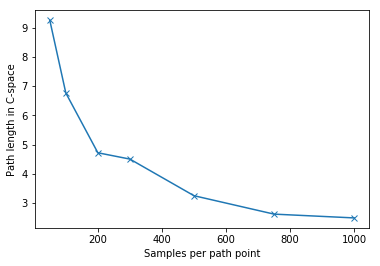

In [10]:
plt.plot(run_ns_values, pl, 'x-')
plt.xlabel("Samples per path point")
plt.ylabel("Path length in C-space")